In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
#自变量数据集
Molecular_Descriptor=pd.read_excel('./data/test.xlsx',header=0)
Molecular_Descriptor=Molecular_Descriptor.iloc[:,1:]
print(Molecular_Descriptor.shape)

(1974, 403)


In [3]:
#因变量数据集

ERa_activity=pd.read_excel('./data/ERα_activity.xlsx',header=0)
ERa_activity=ERa_activity.iloc[:,2]

In [4]:
#随机森林降维
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(Molecular_Descriptor, ERa_activity.astype('int'))
rnd_clf.feature_importances_.shape

(403,)

In [5]:
#显示中文
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [15]:
plt.figure(figsize=(10,5.5))
x_data=rnd_clf.feature_importances_


<Figure size 720x396 with 0 Axes>

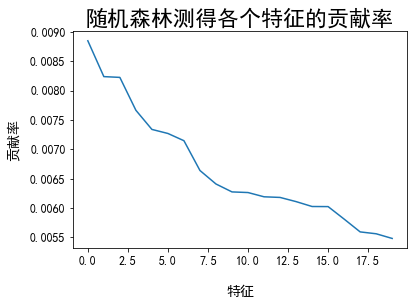

In [16]:
plt.xlabel('特征',labelpad=19)

plt.ylabel('贡献率',labelpad=10)
plt.title('随机森林测得各个特征的贡献率', fontsize=22)
x=np.arange(0,20)
#plt.show()

#返回数组值从小到大的索引
indices_sorted=np.argsort(x_data)[::-1]
Molecular_Descriptor_20=indices_sorted[:20]
plt.plot(x,x_data[indices_sorted[:20]])
plt.show()

In [17]:
Molecular_Descriptor_20

array([ 36, 356, 285, 180, 249, 274, 155, 396, 336, 283, 202, 276,  19,
        18, 366, 401,  37,  20,  21, 227], dtype=int64)

In [18]:
data_20=pd.DataFrame(Molecular_Descriptor.iloc[:,Molecular_Descriptor_20])
data_20.unstack()

BCUTc-1l  0      -0.360525
          1      -0.360530
          2      -0.361379
          3      -0.360530
          4      -0.360530
                    ...   
minsOH    1969    9.808143
          1970    9.696786
          1971    9.645181
          1972    9.668706
          1973    9.793792
Length: 39480, dtype: float64

In [19]:
X=Molecular_Descriptor.iloc[:,Molecular_Descriptor_20]
X.shape
y=ERa_activity
y.shape

(1974,)

In [20]:

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np
from math import sqrt

In [7]:
#均方误差
def mean_squared_error(y_true,y_predict):
    return np.sum((y_true-y_predict)**2/len(y_true))


In [8]:
#均方根误差 RMSE
def root_mean_squared_error(y_true,y_predict):
    return sqrt(mean_squared_error(y_true,y_predict))


In [9]:
def mean_absolute_error(y_true,y_predict):
    return np.sum(np.absolute(y_true-y_predict))/len(y_true)

In [10]:
def r_square(y_true,y_predict):
    return 1-mean_squared_error(y_true,y_predict)/np.var(y_true)



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
#将数据处理成导数
from scipy.stats import reciprocal, uniform

#划分数据集
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=49)

In [34]:
import time
start =time.perf_counter()
svm_clf=SVR(kernel='rbf')
param_distributions={"gamma":reciprocal(0.001,0.01),"C":uniform(1,10)}
#精度评价方式为r2
#训练100次
#参数搜索范围
rnd_search_cv=RandomizedSearchCV(svm_clf,param_distributions,n_iter=100,verbose
                                =2,cv=5,scoring='r2',random_state=42,n_jobs=1)
rnd_search_cv.fit(X_train,y_train)
end=time.perf_counter()
print('Running time: %s Seconds'%(end-start))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....C=4.745401188473625, gamma=0.008927180304353625; total time=   0.0s
[CV] END ....C=4.745401188473625, gamma=0.008927180304353625; total time=   0.0s
[CV] END ....C=4.745401188473625, gamma=0.008927180304353625; total time=   0.0s
[CV] END ....C=4.745401188473625, gamma=0.008927180304353625; total time=   0.0s
[CV] END ....C=4.745401188473625, gamma=0.008927180304353625; total time=   0.0s
[CV] END ....C=8.31993941811405, gamma=0.0039687933304443715; total time=   0.0s
[CV] END ....C=8.31993941811405, gamma=0.0039687933304443715; total time=   0.0s
[CV] END ....C=8.31993941811405, gamma=0.0039687933304443715; total time=   0.0s
[CV] END ....C=8.31993941811405, gamma=0.0039687933304443715; total time=   0.0s
[CV] END ....C=8.31993941811405, gamma=0.0039687933304443715; total time=   0.0s
[CV] END ...C=2.560186404424365, gamma=0.0014321698289111516; total time=   0.0s
[CV] END ...C=2.560186404424365, gamma=0.00143

[CV] END ..C=2.2203823484477883, gamma=0.0031273530367803702; total time=   0.0s
[CV] END ..C=2.2203823484477883, gamma=0.0031273530367803702; total time=   0.0s
[CV] END ..C=2.2203823484477883, gamma=0.0031273530367803702; total time=   0.0s
[CV] END ..C=2.2203823484477883, gamma=0.0031273530367803702; total time=   0.0s
[CV] END ......C=1.343885211152184, gamma=0.0081155956759705; total time=   0.0s
[CV] END ......C=1.343885211152184, gamma=0.0081155956759705; total time=   0.0s
[CV] END ......C=1.343885211152184, gamma=0.0081155956759705; total time=   0.0s
[CV] END ......C=1.343885211152184, gamma=0.0081155956759705; total time=   0.0s
[CV] END ......C=1.343885211152184, gamma=0.0081155956759705; total time=   0.0s
[CV] END ....C=3.587799816000169, gamma=0.004597505784732165; total time=   0.0s
[CV] END ....C=3.587799816000169, gamma=0.004597505784732165; total time=   0.0s
[CV] END ....C=3.587799816000169, gamma=0.004597505784732165; total time=   0.0s
[CV] END ....C=3.58779981600

[CV] END ....C=9.631034258755935, gamma=0.004200472316702199; total time=   0.0s
[CV] END ...C=4.308980248526492, gamma=0.0011575995526672772; total time=   0.0s
[CV] END ...C=4.308980248526492, gamma=0.0011575995526672772; total time=   0.0s
[CV] END ...C=4.308980248526492, gamma=0.0011575995526672772; total time=   0.0s
[CV] END ...C=4.308980248526492, gamma=0.0011575995526672772; total time=   0.0s
[CV] END ...C=4.308980248526492, gamma=0.0011575995526672772; total time=   0.0s
[CV] END ....C=4.109823217156622, gamma=0.002114381362663436; total time=   0.0s
[CV] END ....C=4.109823217156622, gamma=0.002114381362663436; total time=   0.0s
[CV] END ....C=4.109823217156622, gamma=0.002114381362663436; total time=   0.0s
[CV] END ....C=4.109823217156622, gamma=0.002114381362663436; total time=   0.0s
[CV] END ....C=4.109823217156622, gamma=0.002114381362663436; total time=   0.0s
[CV] END ....C=8.29606178338064, gamma=0.0043406770118893994; total time=   0.0s
[CV] END ....C=8.29606178338

[CV] END ...C=4.180034749718638, gamma=0.0012884035848463482; total time=   0.0s
[CV] END ...C=4.180034749718638, gamma=0.0012884035848463482; total time=   0.0s
[CV] END ...C=4.180034749718638, gamma=0.0012884035848463482; total time=   0.0s
[CV] END ...C=3.279351625419417, gamma=0.0026736699110984103; total time=   0.0s
[CV] END ...C=3.279351625419417, gamma=0.0026736699110984103; total time=   0.0s
[CV] END ...C=3.279351625419417, gamma=0.0026736699110984103; total time=   0.0s
[CV] END ...C=3.279351625419417, gamma=0.0026736699110984103; total time=   0.0s
[CV] END ...C=3.279351625419417, gamma=0.0026736699110984103; total time=   0.0s
[CV] END ....C=9.18014765922493, gamma=0.0072565565367861806; total time=   0.0s
[CV] END ....C=9.18014765922493, gamma=0.0072565565367861806; total time=   0.0s
[CV] END ....C=9.18014765922493, gamma=0.0072565565367861806; total time=   0.0s
[CV] END ....C=9.18014765922493, gamma=0.0072565565367861806; total time=   0.0s
[CV] END ....C=9.18014765922

[CV] END ...C=7.335297107608947, gamma=0.0034337975314185755; total time=   0.0s
[CV] END ....C=1.902897700544083, gamma=0.006843881726124968; total time=   0.0s
[CV] END ....C=1.902897700544083, gamma=0.006843881726124968; total time=   0.0s
[CV] END ....C=1.902897700544083, gamma=0.006843881726124968; total time=   0.0s
[CV] END ....C=1.902897700544083, gamma=0.006843881726124968; total time=   0.0s
[CV] END ....C=1.902897700544083, gamma=0.006843881726124968; total time=   0.0s
[CV] END ...C=4.207800649717358, gamma=0.0015364502781676033; total time=   0.0s
[CV] END ...C=4.207800649717358, gamma=0.0015364502781676033; total time=   0.0s
[CV] END ...C=4.207800649717358, gamma=0.0015364502781676033; total time=   0.0s
[CV] END ...C=4.207800649717358, gamma=0.0015364502781676033; total time=   0.0s
[CV] END ...C=4.207800649717358, gamma=0.0015364502781676033; total time=   0.0s
[CV] END ...C=1.4077514155476392, gamma=0.003898458749305194; total time=   0.0s
[CV] END ...C=1.407751415547

In [35]:
rnd_search_cv.best_estimator_

SVR(C=9.074401551640625, gamma=0.007872112644525066)

In [42]:
y_pred1 = rnd_search_cv.best_estimator_.predict(X_train)
y_pred2 = rnd_search_cv.best_estimator_.predict(X_val)
svr=[]
svr.append(root_mean_squared_error(y_train, y_pred1))
svr.append(mean_absolute_error(y_train,y_pred1))
svr.append(r_square(y_train,y_pred1))

Text(0.5, 1.0, 'SVR 30 个测试数据真实值和预测值')

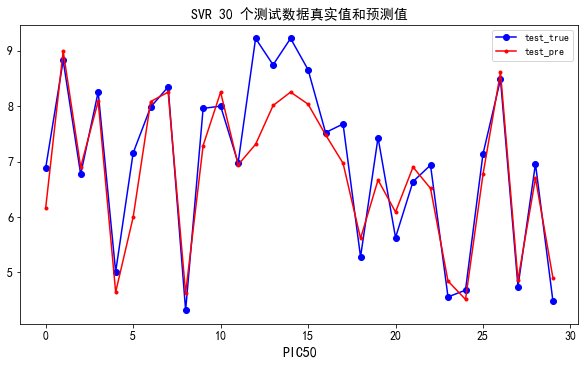

In [21]:
aa_true=pd.DataFrame(y_val[:30]).values
aa_val=y_pred2[:30]
plt.figure(figsize=(10,5.5))
#format_string
plt.plot(aa_true,"bo-",label="true")
plt.plot(aa_val, "r.-",label="val")

plt.xlabel("30个数据编号")
plt.xlabel("PIC50")
plt.legend(['test_true','test_pre'])
plt.title("SVR 30 个测试数据真实值和预测值", fontsize=14)

In [22]:
from scipy.stats import randint
#设定参数搜索范围
param_distribs = {
'n_estimators': randint(low=1, high=200),
'max_features': randint(low=1, high=8) }
forest_reg = RandomForestRegressor(max_features=6,n_estimators=185,random_state=42)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=100,
                              cv=5,scoring='r2', random_state=42)
rnd_search.fit(X_train, y_train)

In [27]:
forest_reg = RandomForestRegressor(max_features=6,n_estimators=185,random_state=42)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=100,
                              cv=5,scoring='r2', random_state=42)

In [28]:
rnd_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=6,
                                                   n_estimators=185,
                                                   random_state=42),
                   n_iter=100,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022834EEEE90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022836BF4250>},
                   random_state=42, scoring='r2')

In [38]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=5, random_state=42)

In [31]:
import joblib

In [33]:
joblib.dump(rf_reg,'rf_reg.pkl')

['rf_reg.pkl']

In [43]:
y_pred1=rnd_search.best_estimator_.predict(X_train)
y_pred2=rnd_search.best_estimator_.predict(X_val)
rf=[]
rf.append(root_mean_squared_error(y_train, y_pred1))
rf.append(mean_absolute_error(y_train,y_pred1))
rf.append(r_square(y_train,y_pred1))

Text(0.5, 1.0, 'RF 30 个测试数据真实值和预测值')

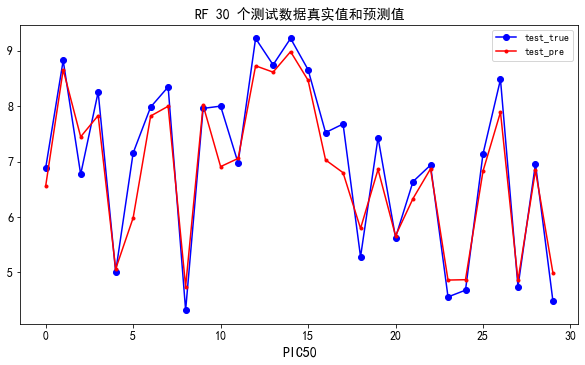

In [30]:
aa_true=pd.DataFrame(y_val[:30]).values
aa_val=y_pred2[:30]
plt.figure(figsize=(10,5.5))
#format_string
plt.plot(aa_true,"bo-",label="true")
plt.plot(aa_val, "r.-",label="val")

plt.xlabel("30个数据编号")
plt.xlabel("PIC50")
plt.legend(['test_true','test_pre'])
plt.title("RF 30 个测试数据真实值和预测值", fontsize=14)

([<matplotlib.axis.XTick at 0x2284002c0d0>,
 [Text(2, 0, 'svr'), Text(6, 0, 'rf')])

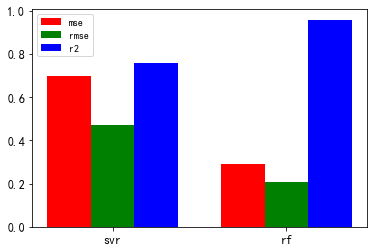

In [57]:
x1=[1,5]
x2=[i+1 for i in x1]
x3=[i+2 for i in x1]
plt.bar(x1,[svr[0],rf[0]],color='r',width=1,label='mse')
plt.bar(x2,[svr[1],rf[1]],color='g',width=1,label='rmse')
plt.bar(x3,[svr[2],rf[2]],color='b',width=1,label='r2')
plt.legend(loc='best')
plt.xticks(x2,['svr','rf'])

In [69]:
X=pd.read_excel("./data/test.xlsx",header=0).iloc[:,1:]

In [75]:
y=pd.read_excel("./data/ADMET.xlsx",header=0)
y1=y.iloc[:,1]
y2=y.iloc[:,2]
y3=y.iloc[:,3]
y4=y.iloc[:,4]
y5=y.iloc[:,5]

X1_train,X1_valid,y1_train,y1_valid=train_test_split(X,y1,test_size=0.2,random_state=49)
X2_train,X2_valid,y2_train,y2_valid=train_test_split(X,y2,test_size=0.2,random_state=49)
X3_train,X3_valid,y3_train,y3_valid=train_test_split(X,y3,test_size=0.2,random_state=49)
X4_train,X4_valid,y4_train,y4_valid=train_test_split(X,y4,test_size=0.2,random_state=49)
X5_train,X5_valid,y5_train,y5_valid=train_test_split(X,y5,test_size=0.2,random_state=49)

In [60]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.grid(True)#生成网格
    plt.show()


In [61]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC

In [72]:
svm_clf=SVC(decision_function_shape="ovr",gamma="auto")

In [73]:
rnd_search_cv=RandomizedSearchCV(svm_clf,param_distributions,n_iter=100,verbose
                                =2,cv=5,scoring='r2',random_state=42,n_jobs=1)
rnd_search_cv.fit(X1_train,y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: Invalid parameter 'max_features' for estimator SVC(gamma='auto'). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

In [67]:
accuracy_SVM_train=sum(cross_val_score(rnd_search_cv.best_estimator_,X1_train,y1_train,cv=10,scoring="accuracy"))/10
y1_scores_svm = cross_val_predict(rnd_search_cv.best_estimator_, X1_train, y1_train, cv=3,method="decision_function")
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y1_train, y1_scores_svm)
SVM_clf_y1=rnd_search_cv.best_estimator_
plot_roc_curve(fpr_svm,tpr_svm)
plt.show()

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [31]:
import joblib

In [33]:
joblib.dump(SVM_clf_y1,'SVM_clf_y5.pkl')

['SVM_clf_y5.pkl']

In [74]:
forest_clf=RandomForestClassifier(random_state=42)

param_distributions={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}
rnd_search_cv_forest=RandomizedSearchCV(forest_clf,param_distributions,n_iter=100,
                                       verbose=2,cv=3,n_jobs=16)
rnd_search_cv_forest.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=16,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022840AA6EF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002283FF2B3A0>},
                   verbose=2)

In [41]:
forest_clf_y1=rnd_search_cv_forest.best_estimator_
forest_clf_y1
joblib.dump(forest_clf_y1,'forest_clf_y1.pkl')

['forest_clf_y1.pkl']

In [76]:
rnd_search_cv_forest.fit(X2_train,y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=16,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022840AA6EF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002283FF2B3A0>},
                   verbose=2)

In [79]:
forest_clf_y2=rnd_search_cv_forest.best_estimator_
joblib.dump(forest_clf_y2,'forest_clf_y2.pkl')

['forest_clf_y2.pkl']

In [80]:
rnd_search_cv_forest.fit(X3_train,y3_train)
forest_clf_y3=rnd_search_cv_forest.best_estimator_
joblib.dump(forest_clf_y3,'forest_clf_y3.pkl')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


['forest_clf_y3.pkl']

In [81]:
rnd_search_cv_forest.fit(X4_train,y4_train)
forest_clf_y4=rnd_search_cv_forest.best_estimator_
joblib.dump(forest_clf_y4,'forest_clf_y4.pkl')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


['forest_clf_y4.pkl']

In [82]:
rnd_search_cv_forest.fit(X5_train,y5_train)
forest_clf_y5=rnd_search_cv_forest.best_estimator_
joblib.dump(forest_clf_y5,'forest_clf_y5.pkl')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


['forest_clf_y5.pkl']